### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
import datetime
import csv
import glob
import shutil
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#pd.set_option("display.max_columns", 20)
#pd.set_option("display.max_rows", 20) 
#pd.options.display.float_format = "{:.3f}".format 

path = "/Users/onurhanaydin/Desktop/MSc/4/Extreme Weather/data/"
opath = "/Users/onurhanaydin/Desktop/"

### Data Pre-processing

In [21]:
var = ["rh", "soil_moist", "uv", "temp"]
box = ["b1", "b2", "b3"]

for b in box:
    for v in var:

        df = pd.read_csv(path+b+"_"+v+".csv", sep=",", index_col="createdAt", parse_dates = True)
        df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")
        df.columns=[v]
        df = df.apply(pd.to_numeric, errors="coerce")
        df = df.resample("H").mean()
        df[v] = round(df[v],1)
        df.to_csv(opath+b+"_"+v+"_updated.csv")


## Data Visualisation

### Temperature

In [2]:
dft = pd.read_excel(path+"all.xlsx", sheet_name="temperature", index_col="time")
dft

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14
time,,,,,,,,,,,,,,
2023-05-25 18:00:00,23.8,23.0,22.8,22.8,23.0,25.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25 19:00:00,24.0,23.6,23.4,23.2,23.1,24.2,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25 20:00:00,26.7,23.5,23.4,23.1,22.9,23.6,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25 21:00:00,26.5,25.2,24.8,24.4,22.9,21.6,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25 22:00:00,25.9,23.3,26.5,24.1,22.7,20.4,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,31.2,33.6
2023-06-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4,32.4,34.6
2023-06-20 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.1,33.2,36.3


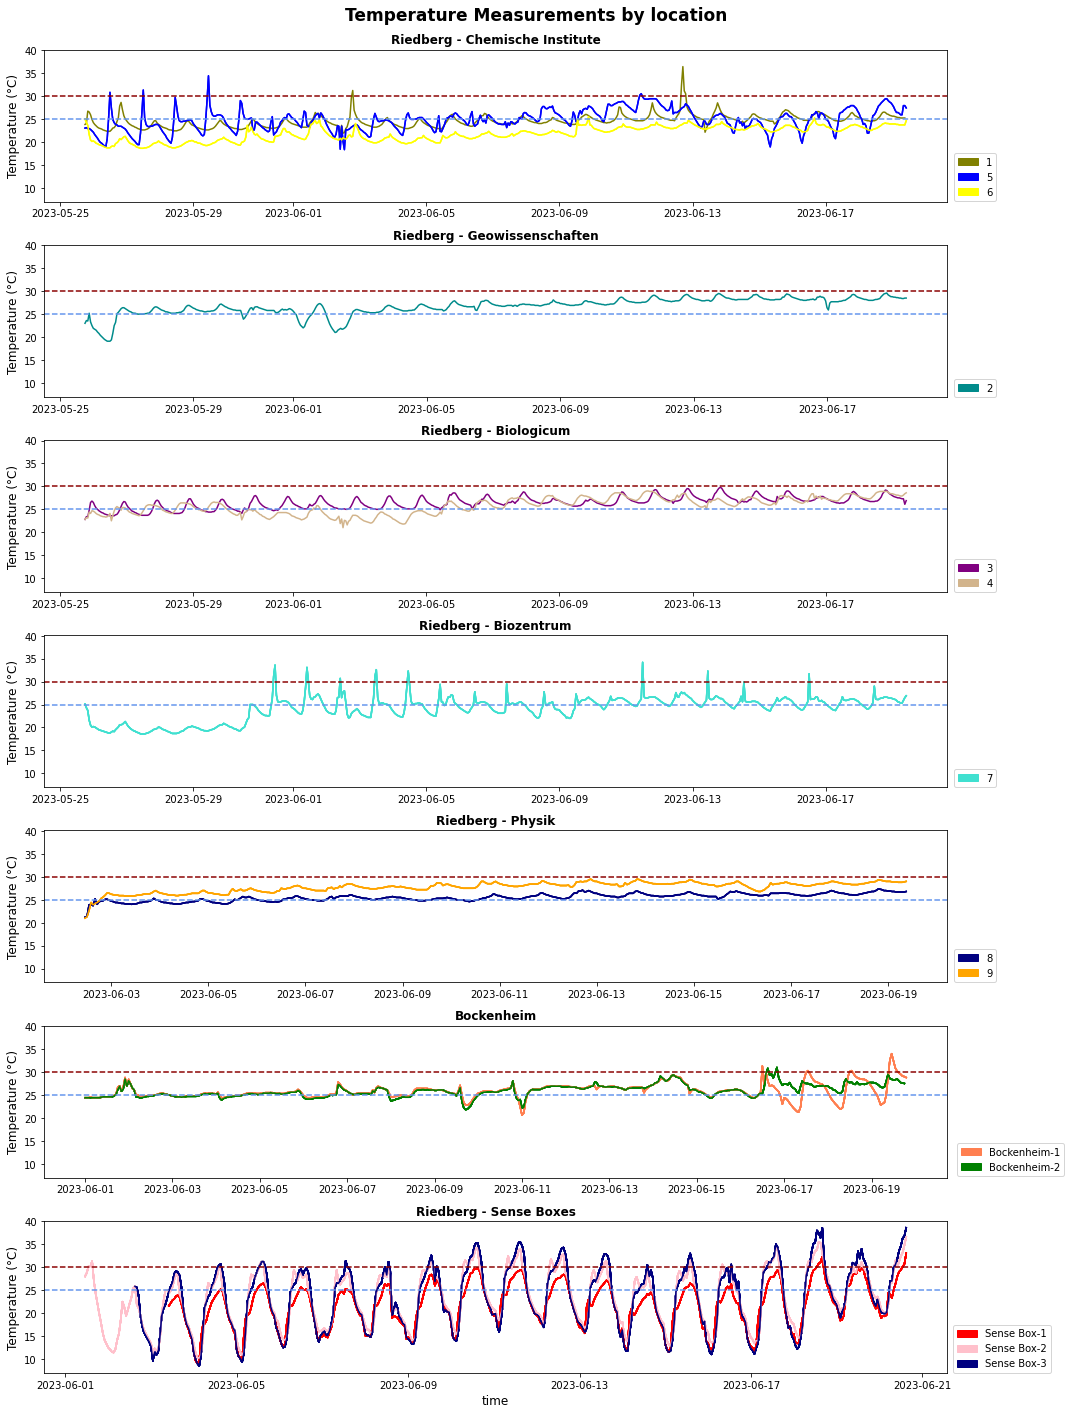

In [13]:
col = ["olive", "darkcyan", "purple", "tan", "blue", "yellow",  "turquoise",
           "navy", "orange", "coral", "green", "red", "pink", "#000080"]

fig, ax = plt.subplots(7,1, sharey='col', figsize=(15,20))

for i in np.arange(0,1):

    ax[0].plot(dft.index, dft.iloc[:,i], color=str(col[i]), label=str(i))
    
    for j in np.arange(1,2):
        
        ax[1].plot(dft.index, dft.iloc[:,j], color=str(col[j]), label=str(j))
        
        for k in np.arange(2,4):    
            
            ax[2].plot(dft.index, dft.iloc[:,k], color=str(col[k]), label=str(k))
            
            for b in np.arange(4,6):
                
                ax[0].plot(dft.index, dft.iloc[:,b], color=str(col[b]), label=str(b))
                
                for c in np.arange(6,7):
                    
                    ax[3].plot(dft.index, dft.iloc[:,c], color=str(col[c]), label=str(c))
                    
                    for d in np.arange(7,9):
                        
                        ax[4].plot(dft.index, dft.iloc[:,d], color=str(col[d]), label=str(d))
                        
                        for e in np.arange(9,11):
                            
                            ax[5].plot(dft.index, dft.iloc[:,e], color=str(col[e]), label=str(e))
                            
                            for f in np.arange(11,14):
                                
                                ax[6].plot(dft.index, dft.iloc[:,f], color=str(col[f]), label=str(f))
                
        
#ax.set_title("Temperature")
ax[0].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[0].set_title("Riedberg - Chemische Institute", fontweight="bold")
ax[0].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[0].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')

ax[1].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[1].set_title("Riedberg - Geowissenschaften", fontweight="bold")
ax[1].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[1].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')

ax[2].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[2].set_title("Riedberg - Biologicum", fontweight="bold")
ax[2].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[2].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')

ax[3].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[3].set_title("Riedberg - Biozentrum", fontweight="bold")
ax[3].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[3].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')

ax[4].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[4].set_title("Riedberg - Physik", fontweight="bold")
ax[4].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[4].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')

ax[5].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[5].set_title("Bockenheim", fontweight="bold")
ax[5].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[5].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')

ax[6].set_ylabel("Temperature (\xb0C)", fontsize=12)
ax[6].set_title("Riedberg - Sense Boxes", fontweight="bold")
ax[6].set_xlabel("time", fontsize=12)
ax[6].axhline(y = 30, color = 'darkred', linestyle = '--')
ax[6].axhline(y = 25, color = 'cornflowerblue', linestyle = '--')


first = mpatches.Patch(color="olive", label="1")
second = mpatches.Patch(color="blue", label="5")
third = mpatches.Patch(color="yellow", label="6")
fourth = mpatches.Patch(color="darkcyan", label="2")
fifth = mpatches.Patch(color="purple", label="3")
sixth = mpatches.Patch(color="tan", label="4")
seventh = mpatches.Patch(color="turquoise", label="7")
eighth = mpatches.Patch(color="navy", label="8")
nineth = mpatches.Patch(color="orange", label="9")
tenth = mpatches.Patch(color="coral", label="Bockenheim-1")
eleventh = mpatches.Patch(color="green", label="Bockenheim-2")
twelth = mpatches.Patch(color="red", label="Sense Box-1")
thirtenth = mpatches.Patch(color="pink", label="Sense Box-2")
fourtenth = mpatches.Patch(color="#000080", label="Sense Box-3")

ax[0].legend(handles=[first ,second, third], bbox_to_anchor=(0.66, -0.1, 0.4, 0.45))
ax[1].legend(handles=[fourth],bbox_to_anchor=(0.66, 0., 0.4, 0.15))
ax[2].legend(handles=[fifth, sixth],bbox_to_anchor=(0.66, -0.05, 0.4, 0.3))
ax[3].legend(handles=[seventh], bbox_to_anchor=(0.66, 0., 0.4, 0.15))
ax[4].legend(handles=[eighth, nineth],bbox_to_anchor=(0.66, -0.05, 0.4, 0.3))
ax[5].legend(handles=[tenth, eleventh],bbox_to_anchor=(0.735, -0.05, 0.4, 0.31))
ax[6].legend(handles=[twelth, thirtenth, fourtenth],bbox_to_anchor=(0.72, -0.1, 0.4, 0.45))

plt.tight_layout()
fig.suptitle("Temperature Measurements by location", fontweight="bold", fontsize=17)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.savefig(opath+"temperature.png", facecolor='white', bbox_inches = 'tight')
plt.show();